In [1]:
%cd ..

/Users/pstock/Documents/privacy_lint


In [2]:
import torch
import matplotlib.pyplot as plt

from privacy_lint.attack_results import AttackResults

%matplotlib inline  
%config InlineBackend.figure_format='retina'

Define the train and test scores
===

In [3]:
n_samples_train = 100000
mean_train = 2
std_train = 1

n_samples_test = 100000
mean_test = 0
std_test = 0.5

scores_train = mean_train + std_train * torch.randn(n_samples_train)
scores_test = mean_test + std_test * torch.randn(n_samples_test)

Compute maximal accuracy threshold
====

In [4]:
results = AttackResults(scores_train, scores_test)
max_accuracy_threshold, max_accuracy = results.get_max_accuracy_threshold()
assert results.get_accuracy(max_accuracy_threshold) == max_accuracy
print(f"Max accuracy threshold: {max_accuracy_threshold:.2f}, max accuracy: {max_accuracy*100:.2f}%")

Max accuracy threshold: 0.83, max accuracy: 91.65%


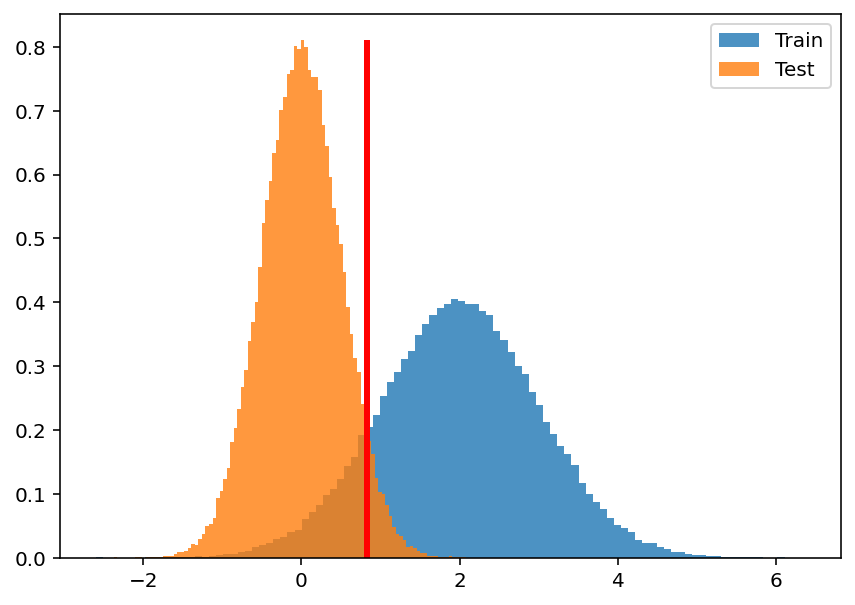

In [5]:
plt.figure(figsize=(7, 5))
counts_train = plt.hist(results.scores_train.numpy(), bins=100, label="Train", alpha=0.8, density=True)[0]
counts_test = plt.hist(results.scores_test.numpy(), bins=100, label="Test", alpha=0.8, density=True)[0]
plt.vlines(max_accuracy_threshold, 0, max(max(counts_train), max(counts_test)), color='r', linewidth=3)
plt.legend()
plt.show()

Compute PR curve
===

mAP: 0.97


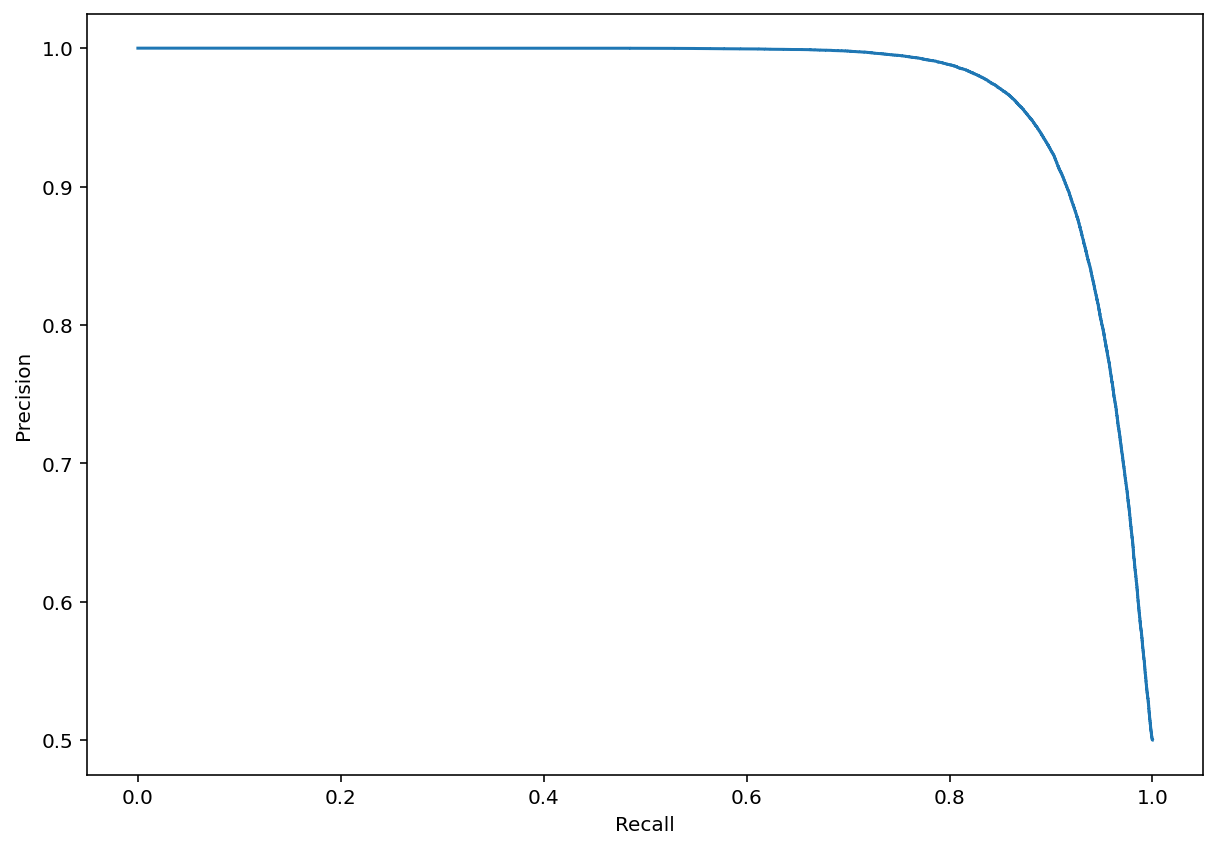

In [6]:
precision, recall = results.get_precision_recall()
mAP = results.get_map()
print(f"mAP: {mAP:.2f}")

plt.figure(figsize=(10, 7))
plt.plot(recall.numpy(), precision.numpy())
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

Compute ROC curve
====

AUC: 0.96


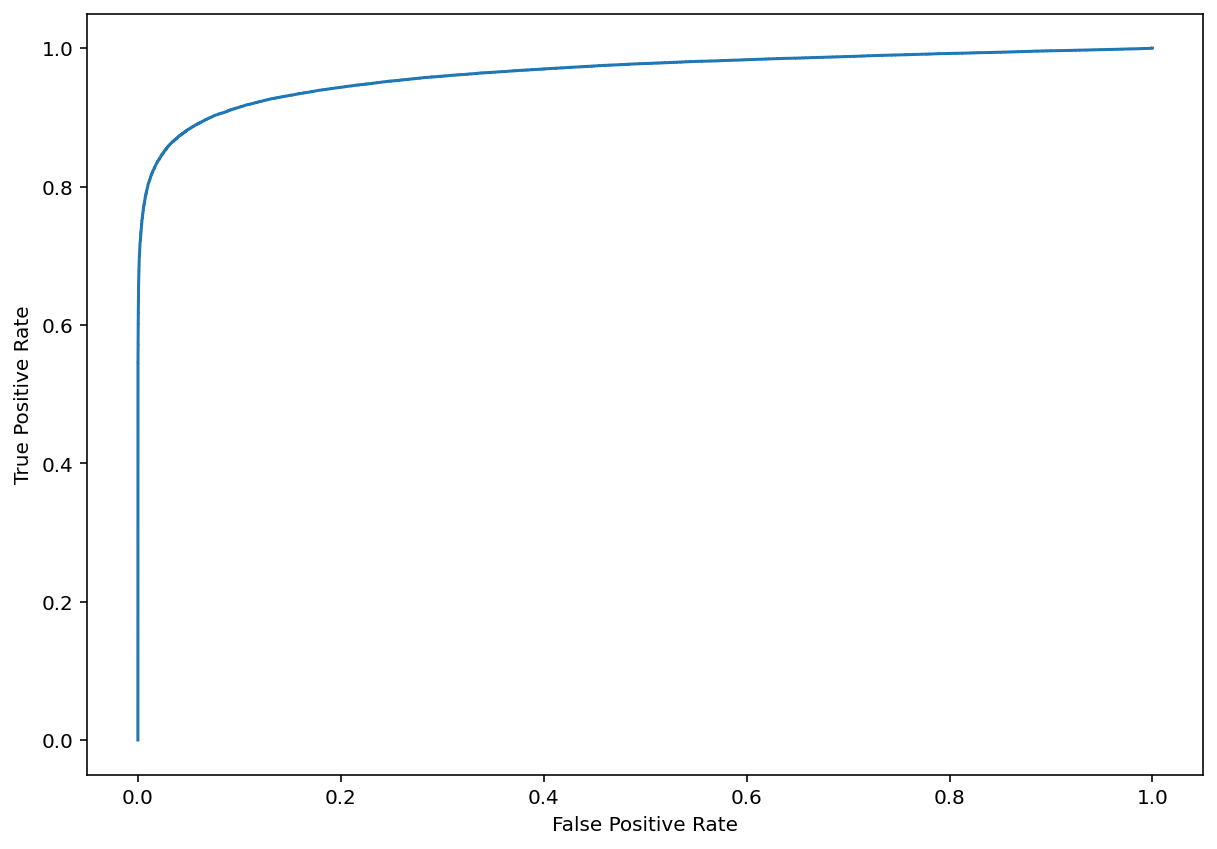

In [7]:
true_positive_rate, false_positive_rate = results.get_tpr_fpr()
auc = results.get_auc()
print(f"AUC: {auc:.2f}")

plt.figure(figsize=(10, 7))
plt.plot(false_positive_rate.numpy(), true_positive_rate.numpy())
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()